# Run, analyze, and write up your experiment results


In [ ]:
# #health care dataset from kagle link: https://drive.google.com/file/d/1ackwsBl3rndAW2oJVZRvYrpopFcwSVuq/view?usp=sharing
#csv file was stored locally in the home folder
import math
import seaborn as sns
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from scipy import stats
data_stroke=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
#let's take a look at our dataset
print(data_stroke.head())
data_stroke.info()


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 e

It looks like there are some bmi values missing, let's impute them and check bmi for outliers

In [ ]:
data_stroke[data_stroke['bmi'].isnull()]['bmi']

1      NaN
8      NaN
13     NaN
19     NaN
27     NaN
        ..
5039   NaN
5048   NaN
5093   NaN
5099   NaN
5105   NaN
Name: bmi, Length: 201, dtype: float64

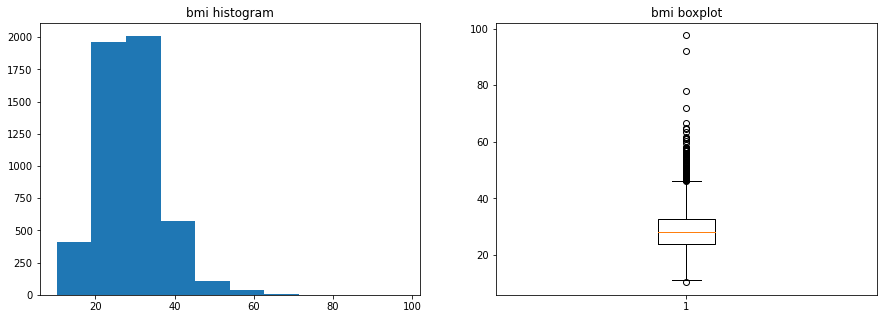

In [ ]:
data_stroke['bmi'].isnull().sum()
#there are 201 missing values, let's impute them with median values

data_stroke.loc[data_stroke['bmi'].isnull(),'bmi']=data_stroke['bmi'].median()

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.hist(data_stroke['bmi'])
plt.title('bmi histogram')
plt.subplot(1,2,2)
plt.boxplot(data_stroke['bmi'])
plt.title('bmi boxplot')
plt.show()

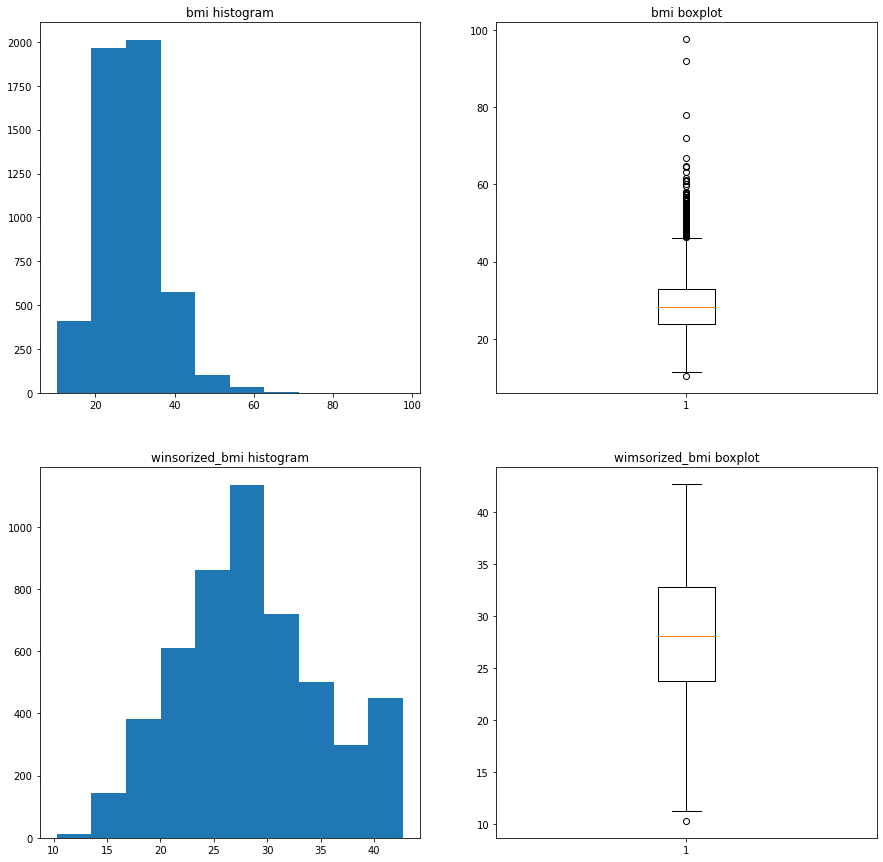

In [ ]:
#Let's deal with outliers
#winsorization method
from scipy.stats.mstats import winsorize

data_stroke['winsorized_bmi'] = winsorize(data_stroke["bmi"], (0, 0.05))
plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.hist(data_stroke['bmi'])
plt.title('bmi histogram')
plt.subplot(2,2,2)
plt.boxplot(data_stroke['bmi'])
plt.title('bmi boxplot')
plt.subplot(2,2,3)
plt.hist(data_stroke['winsorized_bmi'])
plt.title('winsorized_bmi histogram')
plt.subplot(2,2,4)
plt.boxplot(data_stroke['winsorized_bmi'])
plt.title('wimsorized_bmi boxplot')
plt.show()

Let's build a heatmap to reveal correlations in our dataset. It shows no negative correlations, positive correlations between bmi-age, age-stroke, age-hypertension, age-heart decease. other correlations are pretty week.

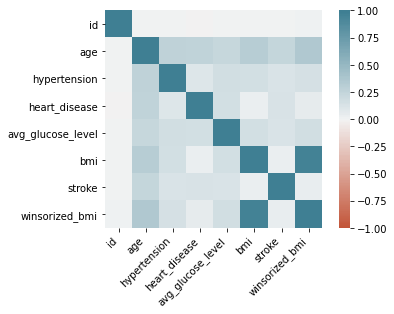

In [ ]:
corr=data_stroke.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Great, we dealt with missing values and outliers for 'bmi' variable.
Let's test our hypothesis:
* DO PATIENTS WITH HIGH LEVEL OF GLUCOSE WHO HAD STROKES TEND TO HAVE HIGHER LEVELS OF GLUCOSE COMPARED TO PATIENTS WHO DIDN'T HAVE STROKE?
* NULL HYPOTHESIS: THERE'S NO DIFFERENCE IN LEVELS OF GLUCOSE AMONG PATIENT WITH GLUCOSE LEVELS >160 (THIS LEVEL IS CONSIDERED HIGH IN MEDICAL STUDIES. WE CAN REFORMULATE IT: THE FIRST POPULATION MEAN EQUAL THE SECOND POPULATION MEAN
* ALTERNATIVE HYPOTHESIS: THE POPULATION MEANS ARE DIFFERENT
* FIRST, WE ESTABLISH NORMALITY OF OUR POPULATIONS, PERFORM STUDENT T-TEST, IF WE CAN REJECT NULL HYPOTHESIS, CONFIDENTIAL INTERVAL WILL BE CALCULATED

In [ ]:
stroke_yes=data_stroke[data_stroke['stroke']==1]
stroke_no=data_stroke[data_stroke['stroke']==0]
stroke_yes.shape, stroke_no.shape

((249, 13), (4861, 13))

In [ ]:
data_stroke['stroke'].unique()

array([1, 0], dtype=int64)

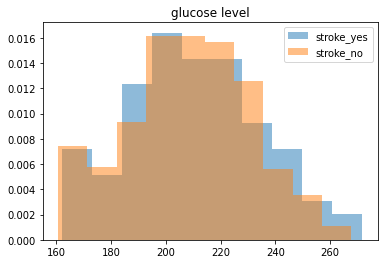

DescribeResult(nobs=89, minmax=(162.14, 271.74), mean=209.88876404494377, variance=591.1491973186926, skewness=0.14928083124680008, kurtosis=-0.3466470130113435)
DescribeResult(nobs=579, minmax=(160.64, 267.76), mean=208.23326424870467, variance=527.190488115173, skewness=-0.030076068403347003, kurtosis=-0.3980814411526601)


In [ ]:
plt.hist(stroke_yes[stroke_yes['avg_glucose_level']>160].avg_glucose_level, alpha=.5, label='stroke_yes', density=True)
plt.hist(stroke_no[stroke_no['avg_glucose_level']>160].avg_glucose_level, alpha=.5, label='stroke_no', density=True)
plt.legend(loc='upper right')
plt.title('glucose level')
plt.show()
print(stats.describe(stroke_yes[stroke_yes['avg_glucose_level']>160].avg_glucose_level))
print(stats.describe(stroke_no[stroke_no['avg_glucose_level']>160].avg_glucose_level))

In [ ]:
#great, skewness and kurtosis are within limits, we can do ttest and the distribution appears close to normal
stats.ttest_ind(stroke_yes[stroke_yes['avg_glucose_level']>160].avg_glucose_level,stroke_no[stroke_no['avg_glucose_level']>160].avg_glucose_level)

Ttest_indResult(statistic=0.6282580780152036, pvalue=0.5300502682138981)

The ttest shows we failed to reject the null hypothesis and the probability of seeing means as close as observed or bigger is more then 50%. Let's see it on barplot. It will show almost the same mean in given population

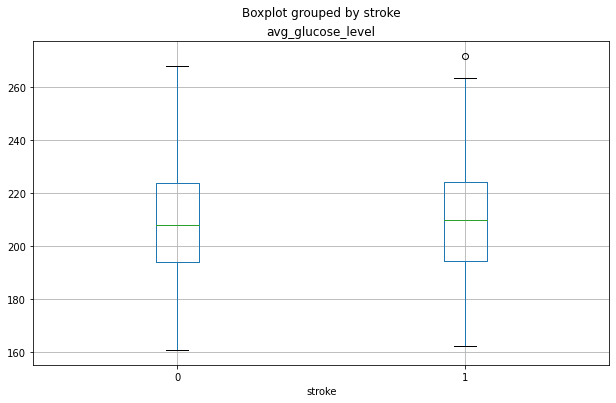

In [ ]:
data_stroke[data_stroke['avg_glucose_level']>160].boxplot('avg_glucose_level', by='stroke', figsize=(10, 6))
plt.show()

# DO OLDER PATIENTS HAVE HIGHER RISK OF STOKE? WHAT IS THE AVERAGE AGE DIFFERENCE BETWEEN TWO GROUPS?

* NULL HYPOTHESIS: THE MEANS OF AGE FOR THE TWO GROUPS ARE THE SAME
* ALTERNATIVE HYPOTHESIS: THE MEANS ARE NOT THE SAME

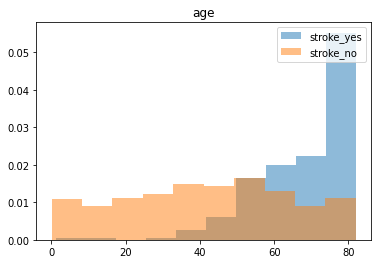

DescribeResult(nobs=249, minmax=(1.32, 82.0), mean=67.72819277108434, variance=161.98720357559267, skewness=-1.3479022845350608, kurtosis=3.0154230033236917)
DescribeResult(nobs=4861, minmax=(0.08, 82.0), mean=41.971544949598844, variance=496.930606110582, skewness=-0.09136107741999078, kurtosis=-0.9754137372100433)


In [ ]:
plt.hist(stroke_yes['age'], alpha=.5, label='stroke_yes', density=True)
plt.hist(stroke_no['age'], alpha=.5, label='stroke_no', density=True)
plt.legend(loc='upper right')
plt.title('age')
plt.show()
print(stats.describe(stroke_yes['age']))
print(stats.describe(stroke_no['age']))

In [ ]:
#data is not normally distributed, we will do Kruskal test:
print(stats.shapiro(stroke_yes['age']))
print(stats.shapiro(stroke_no['age']))

ShapiroResult(statistic=0.8781332969665527, pvalue=3.173771466989661e-13)
ShapiroResult(statistic=0.9704756736755371, pvalue=1.6270152726680496e-30)


In [ ]:
stats.kruskal(stroke_yes['age'],stroke_no['age'])

KruskalResult(statistic=318.1166209843264, pvalue=3.725166547874254e-71)

**We can reject null hypothesis, there is significant difference in number of strokes when people get older.**

barplot visualization:


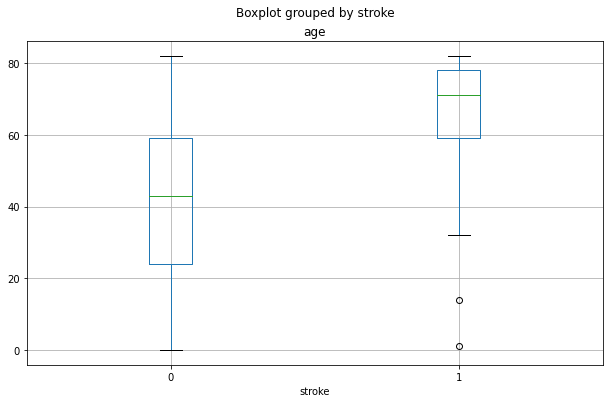

The difference in means between populations: 25.756647821485494


In [ ]:
data_stroke.boxplot('age', by='stroke', figsize=(10, 6))
plt.show()
print('The difference in means between populations: {}'.format(stroke_yes['age'].mean()-stroke_no['age'].mean()))

** we can conclude age is a factor in having a stroke

# DO PEOPLE WITH HIGHER BMI INDEX HAVE HIGHER RISK OF STROKE?
* NULL HYPOTHESIS THE MEANS OF BMI IN TWO POPULATIONS ARE THE SAME
* ALTERNATIVE HYPOTHESIS: THE MEANS ARE NOT THE SAME

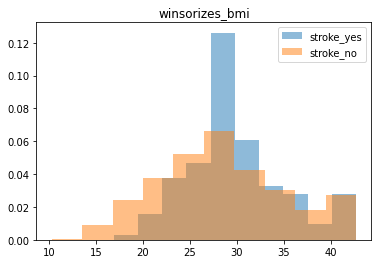

DescribeResult(nobs=249, minmax=(16.9, 42.7), mean=29.920080321285138, variance=28.802417735457965, skewness=0.6455399013516057, kurtosis=0.20025996503728916)
DescribeResult(nobs=4861, minmax=(10.3, 42.7), mean=28.494157580744698, variance=47.563648986685834, skewness=0.2753032321264841, kurtosis=-0.46333312574999663)
Ttest_indResult(statistic=3.2129896443754156, pvalue=0.0013217688741339237)
KruskalResult(statistic=13.22712673259482, pvalue=0.000275926464260983)


In [ ]:
plt.hist(stroke_yes['winsorized_bmi'], alpha=.5, label='stroke_yes', density=True)
plt.hist(stroke_no['winsorized_bmi'], alpha=.5, label='stroke_no', density=True)
plt.legend(loc='upper right')
plt.title('winsorizes_bmi')
plt.show()
print(stats.describe(stroke_yes['winsorized_bmi']))
print(stats.describe(stroke_no['winsorized_bmi']))

print(stats.ttest_ind(stroke_yes['winsorized_bmi'],stroke_no['winsorized_bmi']))
print(stats.kruskal(stroke_yes['winsorized_bmi'],stroke_no['winsorized_bmi']))

We can't use Shapiro test, because second group population is too large (4700), skewness and kurtosis are close to acceptable to perform ttest. We will use kruskal for comparison.
**Both T-test and Kruskal showe that we can reject null hypothesis that there's no significant differences between two groups. There is significant difference - people with stroke have higher BMI index.**
Let's build a barplot and determine confidence interval:

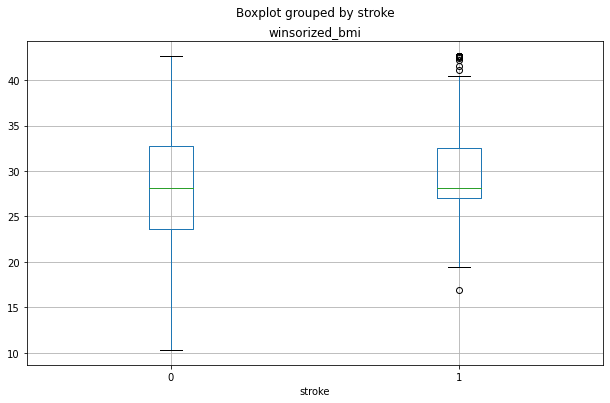

In [ ]:
data_stroke.boxplot('winsorized_bmi', by='stroke', figsize=(10, 6))
plt.show()

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return print("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(stroke_yes['winsorized_bmi'], stroke_no['winsorized_bmi'])

The difference in means at the 95% confidence interval (two-tail) is between -2.120153263378276 and -0.7316922177026034.


As we can see confidence interval is very small: we can conclude with 95% confidence people with stroke have bmi 0.73 to 2.12 higher. So, while bmi certainly is significant, medical professionals shouldn't just rely on bmi value alone, but consider other factors as well.

# IN ADDITION, AMONG PEOPLE WHO HAD STROKE, WHAT OTHER CONDITIONS DID PATIENTS HAVE?

In [ ]:
data_stroke['h_hd_s']=data_stroke['hypertension']+data_stroke['heart_disease']*2+data_stroke['stroke']*3

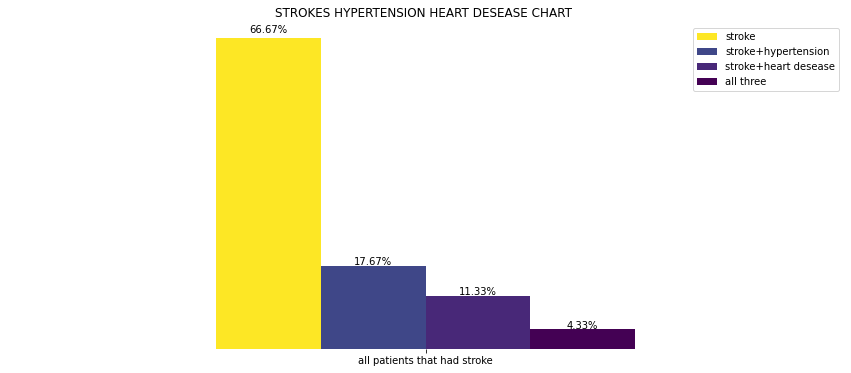

In [ ]:
shh_data=data_stroke['h_hd_s'].value_counts().sort_index()[3:]
shh_data.index=['stroke','stroke+hypertension','stroke+heart desease','all three']
# Normalize result
result_pct = shh_data/sum(shh_data)
#rescale cmap
y=result_pct

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
result_pct_df=result_pct.to_frame().T
ax=result_pct_df.plot(kind='bar', figsize=(15,6), color=my_cmap(rescale(y)))

plt.title('STROKES HYPERTENSION HEART DESEASE CHART ', fontsize=12)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height*100:.2f}'+'%', (x + width/2, y + height*1.02), ha='center')
ax.set_xticklabels(['all patients that had stroke'],rotation=0)
plt.legend(loc='upper right')
plt.show()

**As we can see among people who had stroke, 2/3 didn't have other conditions, while 1/3 did have one or more other conditions.**

# Conclusion

Bmi and age are significant factors in having a stroke.
The analyses showed, the bmi index was unusually high in no stroke group, was there an error in calculating bmi? Possible bias.
As was mentioned earlier there are other biomarkers that influence stroke prediction. It would be interesting to collect them in the dataset. They may include other blood test metrics, perhaps, genome profile, hormone profile data.